### Welcome to the Machine Learning workshop! 

1. Reading the dataset
2. EDA
 - plotting the label
 - time feature plot
 - boxplot of features (MOV ON / OFF)
 - feature correlation to other features plot
 - feature correlation to label
3. feature preprocessing
 - py_neuromodulation
 - PCA
 - normalization
 - feature extraction (point out circularity of leakage, no feature preprocessing and selection in all data)
4. model definition and pipeline, cross validation approach
 - shuffling, stratification
 - classification vs regression
 - boxplot different models
5. visualization of feature importances
 - Intro to shapely feature?
5. using a neural network 
 - early stopping, visualization of training and validation epochs
 - enough data for the chosen architecture 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 1. Reading the data

First we will read our dataset, which are precomputed features by the *py_neuromodulation* framework. They can be accessed within the bids derivates direvtory in a '.csv' format.

In [2]:
df = pd.read_csv('examples/data/derivatives/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg_FEATURES.csv', index_col=[0])

In [3]:
df

,LFP_STN_R_234-LFP_STN_R_567_fft_theta,LFP_STN_R_234-LFP_STN_R_567_fft_alpha,LFP_STN_R_234-LFP_STN_R_567_fft_low beta,LFP_STN_R_234-LFP_STN_R_567_fft_high beta,LFP_STN_R_234-LFP_STN_R_567_fft_low gamma,LFP_STN_R_234-LFP_STN_R_567_fft_high gamma,LFP_STN_R_234-LFP_STN_R_567_fft_HFA,LFP_STN_R_567-LFP_STN_R_234_fft_theta,LFP_STN_R_567-LFP_STN_R_234_fft_alpha,LFP_STN_R_567-LFP_STN_R_234_fft_low beta,...,ECOG_AT_SM_L_5-avgref_fft_HFA,ECOG_AT_SM_L_6-avgref_fft_theta,ECOG_AT_SM_L_6-avgref_fft_alpha,ECOG_AT_SM_L_6-avgref_fft_low beta,ECOG_AT_SM_L_6-avgref_fft_high beta,ECOG_AT_SM_L_6-avgref_fft_low gamma,ECOG_AT_SM_L_6-avgref_fft_high gamma,ECOG_AT_SM_L_6-avgref_fft_HFA,time,ANALOG_ROT_R_1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.0,54.660730
1,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,...,1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1100.0,55.367091
2,-0.817079,-1.261720,0.898509,-1.175679,0.989316,1.276108,-0.666883,-0.817079,-1.261720,0.898509,...,-1.092876,-0.872705,-0.921306,1.141291,1.301047,0.306111,-0.576075,0.357703,1200.0,54.910138
3,-1.181140,-1.017609,-1.037940,-0.339078,-0.258962,0.530215,-0.812672,-1.181140,-1.017609,-1.037940,...,-0.460388,-1.328740,-0.255155,-1.304577,-1.660016,-1.703392,0.379398,-0.031020,1300.0,55.316698
4,0.259496,-0.524616,0.803120,0.042480,1.675814,0.908499,-0.538637,0.259496,-0.524616,0.803120,...,1.425453,-0.683542,-0.090378,-1.092397,-0.795146,1.779646,1.994391,1.994793,1400.0,55.332774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.739675,0.155780,0.516849,0.335039,1.421253,1.882176,-0.368744,0.739675,0.155780,0.516849,...,3.000000,0.386322,1.193776,1.307017,1.034813,1.444081,3.000000,2.251207,17500.0,59.034342
166,-0.071127,-0.442856,-0.345136,0.936503,1.195366,0.664357,-0.967834,-0.071127,-0.442856,-0.345136,...,-0.493897,0.569975,1.256816,1.902236,1.171819,2.179758,2.941018,1.885345,17600.0,59.330688
167,-0.419128,-0.544196,-0.752547,0.765279,1.835549,1.322559,-0.499896,-0.419128,-0.544196,-0.752547,...,-1.209187,0.643474,1.197065,1.626461,1.261317,0.548566,0.177024,-0.353953,17700.0,58.940000
168,-0.412830,-0.448861,-0.592719,1.238253,1.748024,0.968044,-0.135567,-0.412830,-0.448861,-0.592719,...,-1.086947,1.163378,2.452651,1.261157,1.789506,0.760668,2.379931,1.940749,17800.0,58.899072


#### 2. Exploratory Data Analysis
Now we will analyze some features. First we will extract the label for our machine learning analysis, which is in this task a rotational handle, that the patient operated. 

✅ **Task: plot the column 'ANALOG_ROT_R_1' over the 'time' column**.

*Hint: matplotlib pyplot is your friend :)* 

Text(0.5, 1.0, 'Rotational Handle Label')

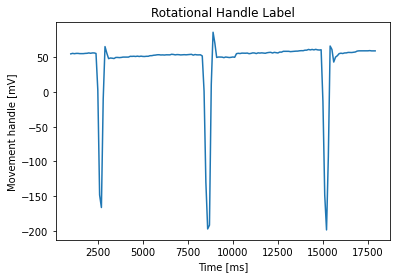

In [4]:
plt.plot(df["time"], df["ANALOG_ROT_R_1"])
plt.xlabel("Time [ms]")
plt.ylabel("Movement handle [mV]")
plt.title("Rotational Handle Label")

Since we want to building a machine learning classifier, we need to binarize the continous analog handle voltage.

We will call it 'mov_class' and save it to the dataframe. 

In [217]:
df["mov_class"] = np.array(df["ANALOG_ROT_R_1"]<0, int)

✅ **Task: Plot the time trace of single feature over time**. 

Text(0.5, 0, 'Time [ms]')

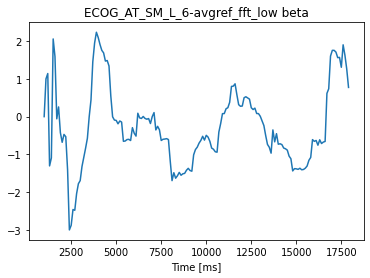

In [7]:
feature = "ECOG_AT_SM_L_6-avgref_fft_low beta"
plt.plot(df["time"], df[feature])
plt.title(feature)
plt.xlabel("Time [ms]")

In the first analyze we want to select a single electrocorticographical channel calles 'ECOG_AT_SM_L_1'

✅ **Task: Select all features of a single channel into a new dataframe called 'df_ECOG_L_1'**

In [8]:
ch_name = "ECOG_AT_SM_L_1"
features_ch = [ch for ch in df.columns if ch_name in ch]
df_ECOG_L_1 = df[features_ch]

We will now have a closer look at the features of channels 'ECOG_AT_SM_L_1'. Our first analysis will be looking at an image of the features over time.

✅ **Task: Use matplotlib.imshow to plot all features within 'df_ECOG_L_1'. Overlay the label 'mov_class' that we created above**

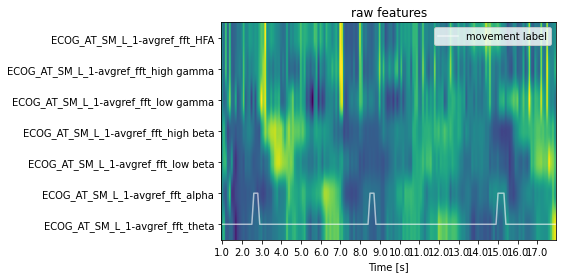

In [9]:
plt.imshow(df_ECOG_L_1.T, aspect='auto')
plt.plot(df["mov_class"], color="white", alpha=0.6, label="movement label")
plt.yticks(np.arange(0, 7, 1), df_ECOG_L_1.columns)
plt.xticks(np.arange(0, df["time"].shape[0], 10), np.round(df["time"][::10]/1000,2))
plt.xlabel("Time [s]")
plt.title("raw features")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

✅ **Task: We can now explore other analysis methods**. The package 'seaborn' provides many such methods. 

Test here the 'heatmap' method for plotting the correlation of our dataframe 'df_ECOG_L_1'

*Hint: Estimate first the correlation matrix of the feature dataframe, use then the heatmap function for plotting*

In [10]:
import seaborn as sns

<AxesSubplot:>

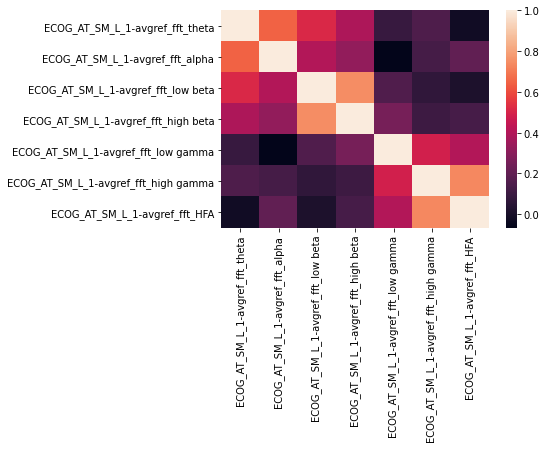

In [11]:
corr = df_ECOG_L_1.corr()
sns.heatmap(corr, 
            xticklabels=df_ECOG_L_1.columns.values,
            yticklabels=df_ECOG_L_1.columns.values)

✅ **Optionally (*Advanced*) Task**
Plot in a boxplot the features separated for mov_class 0 or 1. 

*Hint: Extract first the dataframe segments where mov_class is 0 or 1. Use then pd.melt for reshaping the dataframe into 'variable' and 'value' columns.

Add a third column 'mov' being 0 or 1. Then combine the dataframes and call the seaborn boxplot method.*

In [12]:
df_mov = pd.melt(df_ECOG_L_1[df["mov_class"]==0])
df_mov["mov"] = 0
df_rest = pd.melt(df_ECOG_L_1[df["mov_class"]==1])
df_rest["mov"] = 1

df_sns = pd.concat([df_mov, df_rest])

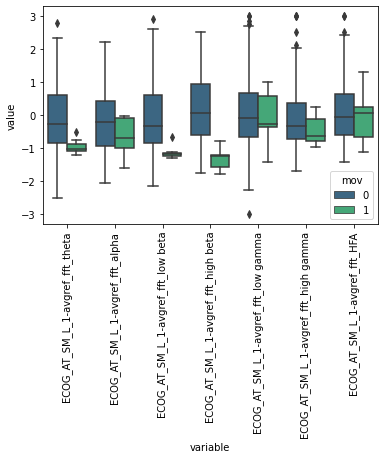

In [13]:
sns.boxplot(data=df_sns, x="variable", y="value", hue="mov", palette="viridis")
plt.xticks(rotation=90)
plt.show()

#### 3. Feature Preprocessing

We will now define the dataset we will use throughout the following analaysis. For that we will use all available features coming from 'ECOG' or 'LFP' channels.

The label will be the upper defined mov_class. 

In [16]:
X = df[[ch for ch in df.columns if "ECOG" in ch or "LFP" in ch]]
y = df["mov_class"]

#### Preprocessing Scaling

✅ **Task: Use the sklearn StandardScaler Function to scale the data to zero mean and unit variance.**

Check for a single feature if standard scaling (commonly called *z-scoring*) was applied beforehand and if it worked after applying the operation.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X.iloc[:,0].mean()

0.23401445390918074

In [19]:
X.iloc[:,0].std()

0.9980977502348917

In [20]:
X_scaled = StandardScaler().fit_transform(np.array(X))

In [21]:
X_scaled[:,0].mean()

0.0

In [22]:
X_scaled[:,0].std()

1.0

#### Preprocessing Dimensionality Reduction

We will no apply a dimensionality reduction method called Principal Component Analysis (PCA). 
PCA finds an orthonormal basis, preserving as much variance of the data as possible. It can be shown that the principle components are eigenvectors of the data covariance matrix.

For visualization reason we will pick here only two components, and enable whitening to have again zero mean and unit variance which will in turn be beneficial for many classifiers.

✅ **Task: Define a sklearn PCA object with two components, and whitening set to True. Transform the scaled data then and save it to X_transformed. 
Plot in a scatter plot then the transformed first components, set the color to our defined label.**

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X_scaled)

PCA(n_components=2, whiten=True)

In [25]:
X_transform = pca.transform(X_scaled)

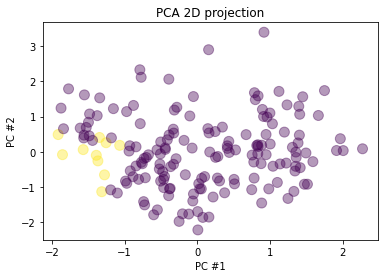

In [26]:
plt.scatter(X_transform[:,0], X_transform[:,1], c=y, s=100, alpha=0.4)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("PCA 2D projection")
plt.show()

Now we have made a dimensionality reduction coming from 77 to 2 features. The data seems segmented enough to be learned by a simple classifier right?


Let's test a first classifier, and visualize the decision boundaries.

✅ **Task: Use sklearn's train_test_split method to split data with a 40% test size into training and test set.**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = \
        train_test_split(X_transform, y, test_size=.4, random_state=42)

#### 4. We now evaluate a first simple model

✅ **Task: Use a LogisticRegression Model without any regularization (check documentation parameters) to fit the data and report the resulting 'accuracy_score' on the test set.**

In [37]:
from sklearn import linear_model, metrics

In [53]:
clf = linear_model.LogisticRegression(penalty='none')

In [54]:
clf.fit(X_train, y_train)
score = metrics.accuracy_score(y_test, clf.predict(X_test))

In [55]:
score

0.8823529411764706

Great! We will now use the classifiers 'decision function' to visualize the model's prediction in addition to the whole dataset.

First let's define a grid where we can test our fitted classifier on:

In [56]:
h = .02  # step size in the mesh

x_min, x_max = X_transform[:, 0].min() - .3, X_transform[:, 0].max() + .3
y_min, y_max = X_transform[:, 1].min() - .3, X_transform[:, 1].max() + .3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

And plot the decision function as well as individual data points. For the test set points will have a red edgecolor:

Text(0.5, 1.0, 'Logistic Regression Linear Classification Decision Boundary')

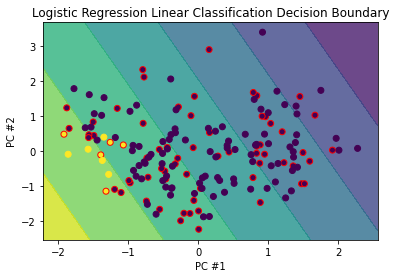

In [57]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

ax = plt.subplot()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.8)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='red')
ax.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.xlabel("PC #1")
plt.ylabel("PC #2")

plt.title("Logistic Regression Linear Classification Decision Boundary")

### Group Discussion 💬

Revise the previous machine learning pipeline steps. What could be optimized and what lead to a possibly faulty model evaluation?

**Problem 1** Preprocessing (PCA + scaling) was conducted for the whole dataset!

**Problem 2** Our performance metric does not capture the label distribution!

**Problem 3** We chose a linear classifier only for the preprocessed data! 

**Problem 4** Consecutive samples are correlated, we should choose a non-shuffled validation approach!

#### 5. Definition of a validation strategy

In the following example we will define a Kfold cross validation strategy.

✅ **Task: Use sklearn's kFold method to split data 3 times without shuffling. Plot each label of the respective test sets.**

In [108]:
from sklearn import model_selection, ensemble, svm, base

In [109]:
cv = model_selection.KFold(n_splits=3, shuffle=False)

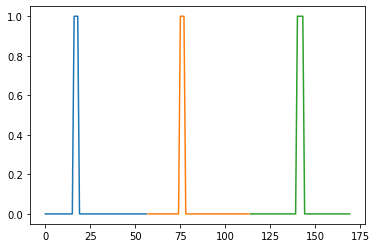

In [110]:
for train_index , test_index in cv.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    plt.plot(y_test)

✅ **Task: Fixing errors**

Now it's your turn to fix the errors we made above. Therefore write a function 'run_validation' that get's as input parameter the machine learning model we're going to train and the defined k fold cross validation.

Then iterate through the three folds, pay attention that you
1. define the PCA preprocessing separatedly for train and test set
2. clone the model within each itereation (sklearn model.base.clone)
3. report the 'balanced_accuracy_score' 

Then return the accuracy scores, concatenated test labels and the model's prediction.
In addition return the transformed train and test features and labels. 

In [121]:
def run_validation(model=svm.SVC(gamma=2, C=1), cv = model_selection.KFold(n_splits=3, shuffle=False)):
    
    acc_score = []
    l_pred_values = []
    l_y_test = []
    
    for train_index , test_index in cv.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        pca = PCA(n_components=2, whiten=True)
        pca.fit(X_train)
        X_tr_sc_pca = pca.transform(X_train)

        pca = PCA(n_components=2, whiten=True)
        pca.fit(X_test)
        X_te_sc_pca = pca.transform(X_test)

        #clf_rf = ensemble.RandomForestClassifier(n_estimators=5, max_depth=5)
        clf_ = base.clone(model)  # start with C = 1
        clf_.fit(X_tr_sc_pca, y_train)
        pred_values = clf_.predict(X_te_sc_pca)

        acc = metrics.balanced_accuracy_score(y_test, pred_values)
        acc_score.append(acc)
        l_y_test.append(y_test)
        l_pred_values.append(pred_values)
    return clf_, acc_score, np.concatenate(l_y_test), np.concatenate(l_pred_values), X_te_sc_pca, X_tr_sc_pca,\
            y_test, y_train

✅ **Task: Test the above function using a Support Vector Classifier, and set gamma and C to 50, class_weihts should be balanced.**

What's the accuracy scores?

In [204]:
clf, acc_scores, y_test_, y_pred_, X_te_sc_pca, X_tr_sc_pca,\
  y_test, y_train  = run_validation(model=svm.SVC(gamma=50, C=50, class_weight="balanced"))

In [205]:
acc_scores

[0.5, 0.5, 0.5]

✅ **Task: Plot the true label movements and the predictions. In addition use the lower code again to visualize the deccision function.**

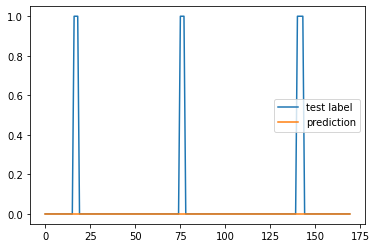

In [130]:
plt.plot(y_test_, label="test label")
plt.plot(y_pred_, label="prediction")
plt.legend()

Text(0.5, 1.0, 'plotting linear classification decision boundary')

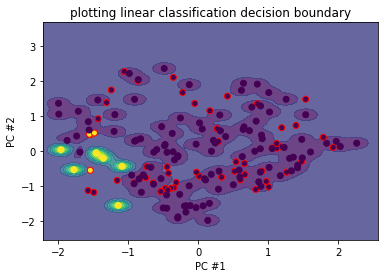

In [131]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

ax = plt.subplot()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.8)
ax.scatter(X_te_sc_pca[:,0], X_te_sc_pca[:,1], c=y_test, edgecolors='r')
ax.scatter(X_tr_sc_pca[:,0], X_tr_sc_pca[:,1], c=y_train)

plt.xlabel("PC #1")
plt.ylabel("PC #2")

plt.title("plotting linear classification decision boundary")

What went wrong?

How do we need to change the regularization parameter 'C' to reduce overfitting? What about the kernel coefficient gamma?

✅ **Task: Change the regularization parameter C and kernel coefficient gamma to achieve higher generalization performance.**

#### Introduce Regularization to reduce model complexity gamma=0.01, C=5

In [206]:
clf, acc_scores, y_test_, y_pred_, X_te_sc_pca, X_tr_sc_pca,\
  y_test, y_train  = run_validation(model=svm.SVC(class_weight="balanced", C=0.1, gamma=2))

In [207]:
acc_scores

[0.8240740740740741, 0.4351851851851852, 0.5961538461538461]

In [208]:
np.mean(acc_scores)

0.6184710351377017

Text(0.5, 1.0, 'plotting linear classification decision boundary')

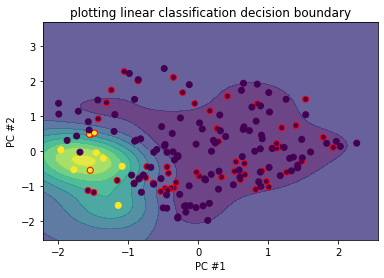

In [209]:
#Z = clf_rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

ax = plt.subplot()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.8)
ax.scatter(X_te_sc_pca[:,0], X_te_sc_pca[:,1], c=y_test, edgecolors='r')
ax.scatter(X_tr_sc_pca[:,0], X_tr_sc_pca[:,1], c=y_train)

plt.xlabel("PC #1")
plt.ylabel("PC #2")

plt.title("plotting linear classification decision boundary")

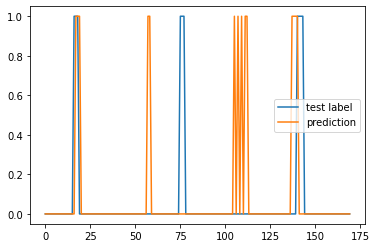

In [210]:
plt.plot(y_test_, label="test label")
plt.plot(y_pred_, label="prediction")
plt.legend()

#### Trying out different models